In [1]:
ls datasets/

bioCON_plant_diversity.txt
national_parks_biodiversity_parks.csv
national_parks_biodiversity_species.csv
plant_pollinator_diversity_set1.csv
plant_pollinator_diversity_set2.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bicon = pd.read_csv('datasets/bioCON_plant_diversity.txt', delimiter='\t')
parks = pd.read_csv('datasets/national_parks_biodiversity_parks.csv')
species = pd.read_csv('datasets/national_parks_biodiversity_species.csv', dtype='string')
pollinator1 = pd.read_csv('datasets/plant_pollinator_diversity_set1.csv')
pollinator2 = pd.read_csv('datasets/plant_pollinator_diversity_set2.csv')

In [4]:
species[species['Common Names'] == 'Moose'].head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
24768,DENA-1003,Denali National Park and Preserve,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Common,Breeder,NaN,NaN
33458,GAAR-1002,Gates Of The Arctic National Park and Preserve,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Common,Breeder,NaN,NaN
34813,GLAC-1004,Glacier National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Common,Breeder,NaN,NaN
37366,GLBA-1001,Glacier Bay National Park and Preserve,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Common,Breeder,NaN,NaN


<AxesSubplot:xlabel='YEAR', ylabel='TOT_STALKS'>

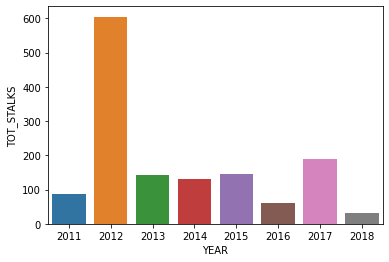

In [5]:
smp = pollinator2.sample(100)
smp = smp.groupby('YEAR')[['YEAR', 'NO_STALK']].agg({'YEAR':'first','NO_STALK':'sum'}).rename(columns={'NO_STALK':'TOT_STALKS'})
sns.barplot(data=smp, x='YEAR', y='TOT_STALKS')

In [6]:
bicon.columns

Index(['Year', 'Plot', 'Ring', 'CO2 Treatment', 'Nitrogen Treatment',
       'CountOfSpecies', 'CountOfGroup', 'Experiment', 'monospecies',
       'Monogroup', 'Water Treatment', 'Temp Treatment', 'Depth', 'Carbon(%)',
       'Nitrogen(%)', 'C/N Ratio'],
      dtype='object')

In [4]:
display(pollinator1.columns)
display(pollinator2.columns)

Index(['DBCODE', 'ENTITY', 'COMPLEX', 'MEADOW', 'PLOT_ID', 'YEAR',
       'SAMPLEDATE', 'WATCH', 'OBSERVER', 'PLOT', 'START_TIME', 'END_TIME',
       'MINUTE', 'CLOUDS', 'WIND', 'TEMP', 'PPI_STATUS', 'NO_INT',
       'PLTSP_CODE', 'PLTSP_NAME', 'VISSP_CODE', 'VISSP_NAME', 'VISSP_TYPE',
       'REF_NO', 'VISSP_NO', 'QC_NOTES'],
      dtype='object')

Index(['DBCODE', 'ENTITY', 'COMPLEX', 'MEADOW', 'PLOT_ID', 'YEAR',
       'SAMPLEDATE', 'WATCH', 'OBSERVER', 'PLOT', 'FLW_STATUS', 'PLTSP_CODE',
       'PLTSP_NAME', 'NO_STALK', 'NO_FLWS', 'QC_NOTES'],
      dtype='object')

<AxesSubplot:xlabel='Nitrogen(%)', ylabel='Count'>

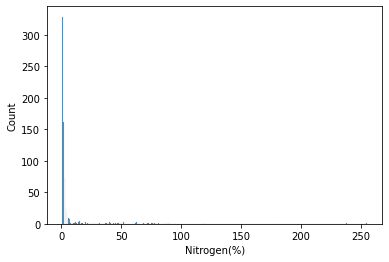

In [7]:
sns.histplot(data=bicon.groupby('Nitrogen(%)')['Nitrogen(%)'].count())

<AxesSubplot:>

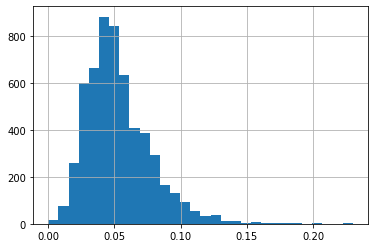

In [52]:
#Distribution of Nitrogen percentage

pd.to_numeric(bicon['Nitrogen(%)'], errors='coerce').dropna().hist(bins=30)


### Correlation matrices

Text(0.5, 1.0, 'Correlation matrix')

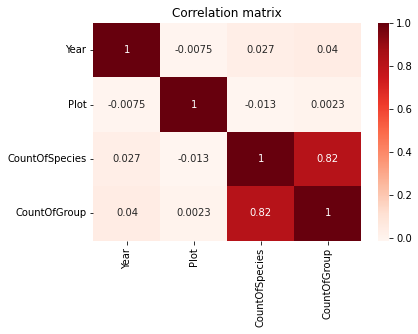

In [8]:
sns.heatmap(bicon.corr(), annot=True, cmap=plt.cm.Reds)
plt.title('Correlation matrix')